### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#191970;">Project 5 - Linear Regression - Price Predictions for Zirconia - Part 1

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#708098;">Project by - Madhu Narayanan  

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#708098;">Batch - July 2020

#### <span style="font-family: Arial; font-weight:regular;font-size:1.3em;color:#2F4F4F">Problem Statement

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). 

The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. 

Also, provide them with the best 5 attributes that are most important.

<b>Data Dictionary:</b>

<i>Variable Name	-         Description</i>  

Carat-    	         Carat weight of the cubic zirconia.  

Cut-	             Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good,                        Very Good, Premium, Ideal.  

Color-   	         Colour of the cubic zirconia.With D being the best and J the worst.  

Clarity-  	         cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order                        from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2,                      SI1, SI2,I1, I2, I3  

Depth-    	         The Height of a cubic zirconia, measured from the Culet to the table, divided by its                          average Girdle Diameter.  

Table-    	         The Width of the cubic zirconia's Table expressed as a Percentage of its Average                              Diameter.  

Price-   	         the Price of the cubic zirconia.  

X -   	             Length of the cubic zirconia in mm.  

Y -  	             Width of the cubic zirconia in mm.  

Z -  	             Height of the cubic zirconia in mm.  


#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#2F4F4F">Import important libraries

In [1]:
import numpy as np   
import pandas as pd  

import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler 

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import zscore

import math



import warnings
warnings.filterwarnings('ignore')

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#2F4F4F">Extracting the dataset which is a csv file format

In [2]:
df = pd.read_csv('cubic_zirconia.csv')

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


The dataset has 11 attributes with 'price' being the prdictor class variable as given  in the Problem statement. Note that the Unnamed: 0 is a nominal/unique id which will not be of use for us in this analysis, hence let's drop this attribute.

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.shape

(26967, 10)

The dataset now has 26967 rows and 10 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Checking for missing values

In [8]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

There are 697 missing values in the 'depth' variable. Let's impute it with mean or median value as both are almost in the same levels. We shall go ahead by imputing with median value.

Note that the missing values and outliers needs to be checked and treated also there are 3 object variables that had to be converted to Categorical variables. Therefore the Univariate and Multivariate analysis are done after these treatments.


#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">1.2 a. Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? 



In [9]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()      

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Now the dataset is clean with out any missing values.

From the describe function output table, it is clearly evident that variables x,y,z have got zeros as values (min values in the table). Length, Width and Height cannot be zero. Therefore we impute those zero values with median values of respective variables.

In [10]:
(df==0).sum().sum()

15

In [11]:
print((df.x == 0).sum().sum())
print((df.y == 0).sum().sum())
print((df.z == 0).sum().sum())

3
3
9


In [12]:
df.x.replace(0,5.69,inplace=True)
df.y.replace(0,5.71,inplace=True)
df.z.replace(0,3.52,inplace=True)

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Checking for duplicate records

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,5.69,5.71,3.52,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [14]:
df.drop_duplicates(inplace=True) 

In [15]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(26933, 10)


There are 34 duplicate records which is removed. 

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">1.2. b. Do you think scaling is necessary in this case?

For a Linear Regression model Scaling is generally not necessary unless untill following situations arises:
    
    1. While using the Gradient Descent method.
    2. When the intercepts go negative which becomes meaningless. However this can be ignored if and only          the problem is all about only prediction and not about independent variables. We shall see whether            scaling is required after running the  SKlearn library and stats model (for understanding the                  statistical implications of independent variables).

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">1.3. a. Encode the data (having string values) for Modelling. 



#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#2F4F4F">Unique values for categorical variables
    
This is done to check, are there any categorical variable having large insignificant categories which may impact the modelling.

In [16]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




All the object variables have got fair amount of categories. 

In [17]:
df.select_dtypes(include='object').head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


<Figure size 864x720 with 0 Axes>

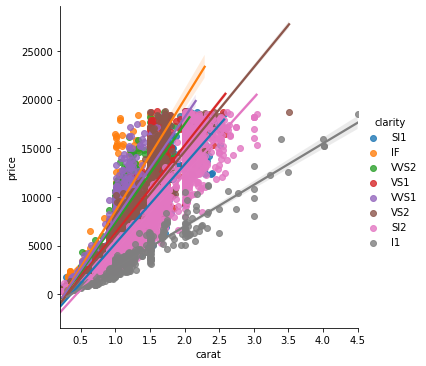

In [18]:
plt.figure(figsize=(12,10))
sns.lmplot(y="price", x="carat",hue="clarity", data=df);

<Figure size 864x720 with 0 Axes>

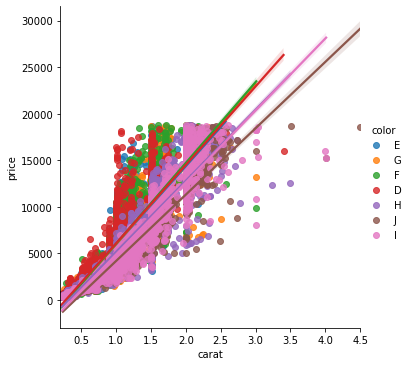

In [19]:
plt.figure(figsize=(12,10))
sns.lmplot(y="price", x="carat",hue="color", data=df);

<AxesSubplot:ylabel='Density'>

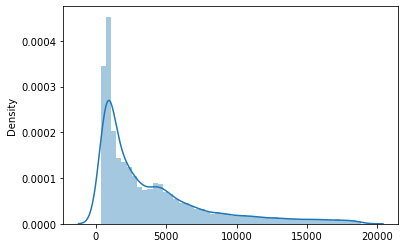

In [20]:
sns.distplot(x=df['price'])

The dataset is not normally distributed for price and is right skewed. To understand the normality of the datset, lets perform skew test.

In [21]:
df.skew()

carat    1.114789
depth   -0.029475
table    0.765805
x        0.402072
y        3.886002
z        2.639943
price    1.619116
dtype: float64

The attributes, 'carat','x','y' & 'z' are not normally distributed. This could be an indicator that these independent variables are correlated to each other. This is multicollinearity and will be an issue in Linear regression. 

The assumption in LR is that the independent variables should not be correlated to each other. This will reduce the variance and the dataset will not over-fit while performing the model evaluation in Train & Test split. 

Let's check the same with correlation matrix, heat-map and OLS method using stats model. However note that the problem statement is all about predicting the target variable, in this case 'price' and not about the independent varibles. 

Before we convert the object variables to categorical, we should keep in mind that the varibles have ordinal data. To handle ordinal data, we will be using pd.Catagorical method to convert. However since there is an order, we shall assign the order to the numbers in corresponding way, as the conversion happens in alphabetical order by python. To avoid misrepresenting the order, we are assigning rating or numbering in order.

In [22]:
df.cut = np.where(df.cut == 'Fair', '0', df.cut)
df.cut = np.where(df.cut == 'Good', '1', df.cut)
df.cut = np.where(df.cut == 'Very Good', '2', df.cut)
df.cut = np.where(df.cut == 'Premium', '3', df.cut)
df.cut = np.where(df.cut == 'Ideal', '4', df.cut)
df.color = np.where(df.color == 'J','0', df.color)
df.color = np.where(df.color == 'I','1', df.color)
df.color = np.where(df.color == 'H','2', df.color)
df.color = np.where(df.color == 'G','3', df.color)
df.color = np.where(df.color == 'F','4', df.color)
df.color = np.where(df.color == 'E','5', df.color)
df.color = np.where(df.color == 'D','6', df.color)
df.clarity = np.where(df.clarity == 'I1','0', df.clarity)
df.clarity = np.where(df.clarity == 'SI2','1', df.clarity)
df.clarity = np.where(df.clarity == 'SI1','2', df.clarity)
df.clarity = np.where(df.clarity == 'VS2','3', df.clarity)
df.clarity = np.where(df.clarity == 'VS1','4', df.clarity)
df.clarity = np.where(df.clarity == 'VVS2','5', df.clarity)
df.clarity = np.where(df.clarity == 'VVS1','6', df.clarity)
df.clarity = np.where(df.clarity == 'IF','7', df.clarity)

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Converting to categorical using pd.Categorical

The object attributes/variables - Cut, Color & Clarity are Ordinal in nature. Since the data are ordinal, we use pd.Categorical instead of One Hot Encoding which is used for non-ordered/Nominal data.

Here, for now let us convert these into Categorical using pd.Categories <b>to avoid high dimensionality because of OHE(get_dummies)</b>


In [23]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes
        
        

In [24]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65,779


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int8   
 2   color    26933 non-null  int8   
 3   clarity  26933 non-null  int8   
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), int8(3)
memory usage: 1.7 MB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.20,0.40,0.70,1.05,4.50
cut,26933.0,2.909702,1.113165,0.00,2.00,3.00,4.00,4.00
color,26933.0,3.394794,1.705883,0.00,2.00,3.00,5.00,6.00
clarity,26933.0,3.053577,1.646749,0.00,2.00,3.00,4.00,7.00
depth,26933.0,61.746701,1.393875,50.80,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.00,56.00,57.00,59.00,79.00
x,26933.0,5.729769,1.126285,3.73,4.71,5.69,6.55,10.23
y,26933.0,5.733526,1.163989,3.71,4.72,5.70,6.54,58.90
z,26933.0,3.538815,0.717377,1.07,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.00,945.00,2375.00,5356.00,18818.00


#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Data Distribution

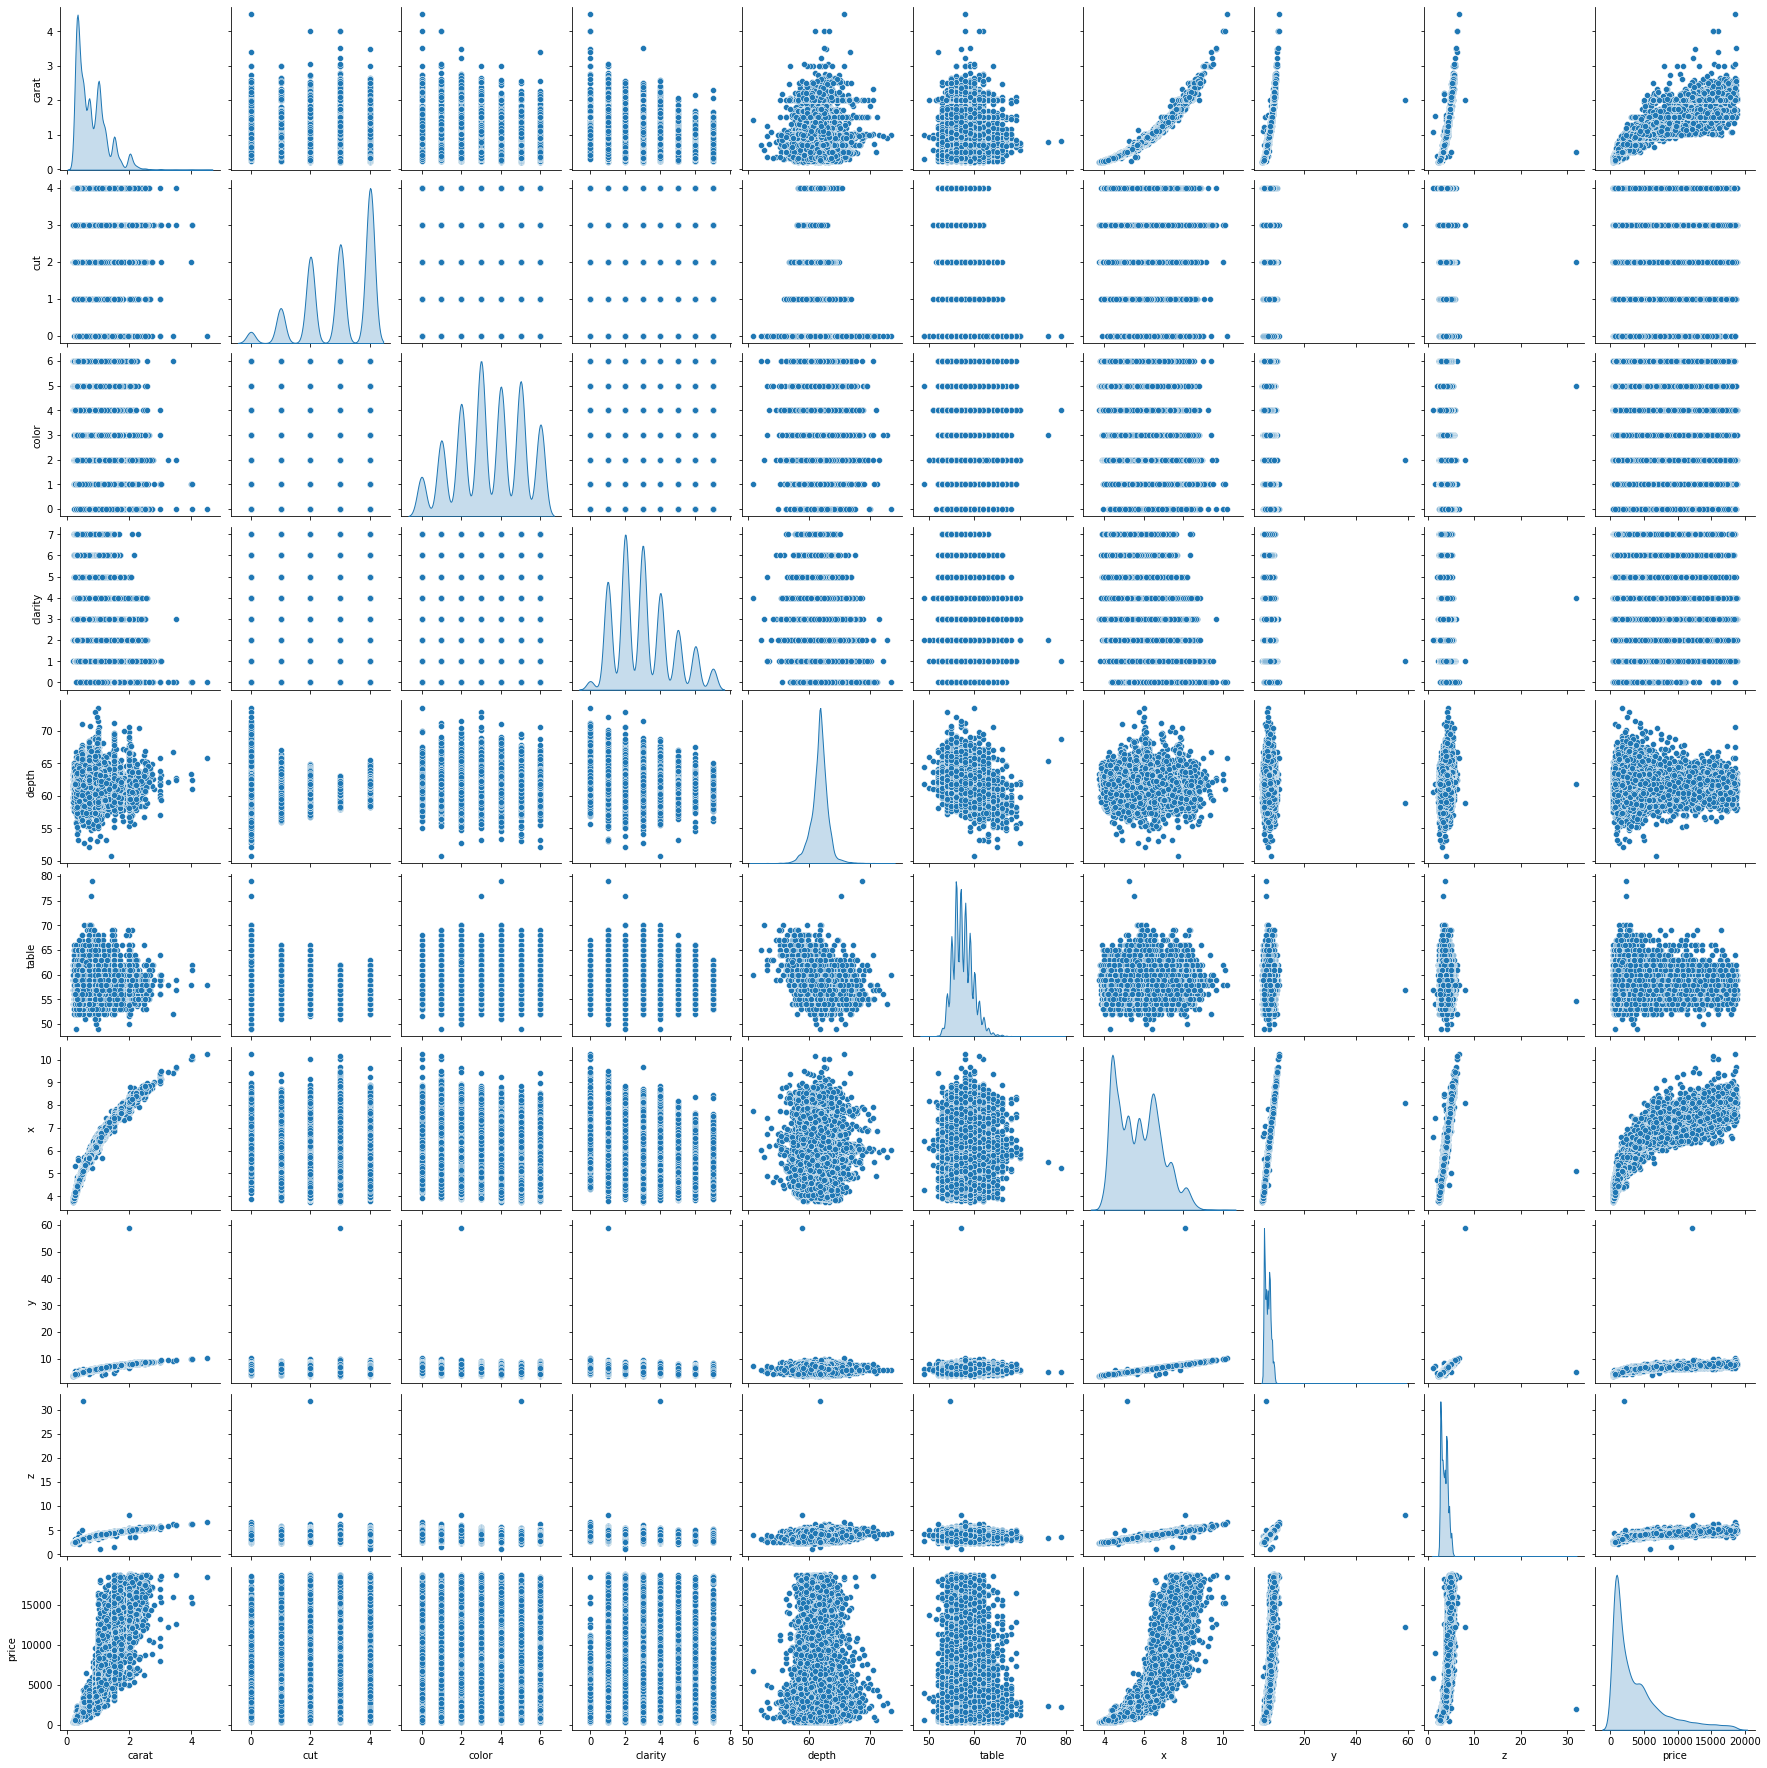

In [27]:
df_attr = (df)
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

The pair plot is a wonderful visualisation tool to perform multivariate analysis and also to understand the distribution of data for the attributes.

From the pairplot we can find the following:

1. 'Depth' is normally distributed as well does not have multimodal which indicates, it can be a good predictor of y variable.

2. 'table','color' & 'x', 'z' are normally distriby=uted biut with multimodal peaks.

3. Rest all the data are eith right or left skewed, which we also saw in the skew test. This is could be the presence of multicollinearity.


#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Correlation Plot

In [28]:
corr = df.corr()
corr

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.139845,-0.293894,-0.354829,0.034772,0.181539,0.977896,0.942387,0.946321,0.922409
cut,-0.139845,1.000000,0.026791,0.183258,-0.211973,-0.443218,-0.132843,-0.127390,-0.154315,-0.059768
color,-0.293894,0.026791,1.000000,-0.021329,-0.050222,-0.024124,-0.274309,-0.264461,-0.268913,-0.172883
clarity,-0.354829,0.183258,-0.021329,1.000000,-0.068033,-0.156570,-0.376314,-0.358453,-0.367303,-0.150674
depth,0.034772,-0.211973,-0.050222,-0.068033,1.000000,-0.293713,-0.018393,-0.024388,0.097096,-0.002840
table,0.181539,-0.443218,-0.024124,-0.156570,-0.293713,1.000000,0.197458,0.183503,0.150948,0.126844
x,0.977896,-0.132843,-0.274309,-0.376314,-0.018393,0.197458,1.000000,0.962532,0.960684,0.887435
y,0.942387,-0.127390,-0.264461,-0.358453,-0.024388,0.183503,0.962532,1.000000,0.932692,0.857241
z,0.946321,-0.154315,-0.268913,-0.367303,0.097096,0.150948,0.960684,0.932692,1.000000,0.855306
price,0.922409,-0.059768,-0.172883,-0.150674,-0.002840,0.126844,0.887435,0.857241,0.855306,1.000000


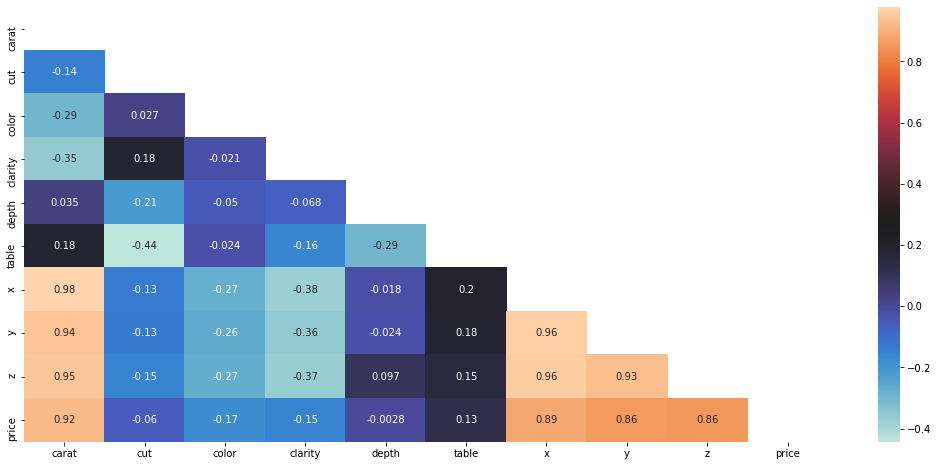

In [29]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True, mask=mask,cmap='icefire');

From the heatmap, we can infer the following on correlation:
    
    1. The predictor variable 'price' is highly positive correlated with 4 out of 9 variables.  
    
        a. price - carat: High positive correlation with 0.94.  
        b. price - x,y,z (which basically means size) - High postive correlation with 0.91 respectively.  
        
     2. Independant variables 'carat', 'x', 'y', & 'z' are highly postive correlated which is an indication 
        of multicollinearity.
            
            a. carat - x,y & z - High positive correlation of 0.98 respectively.
            b. x - y is perfectly positive correlated to max with 1
            c. x - z & y - z is near perfectly positive correlated to max with 0.99.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Check for outliers

Shape before Outliers Treatment (26933, 10)


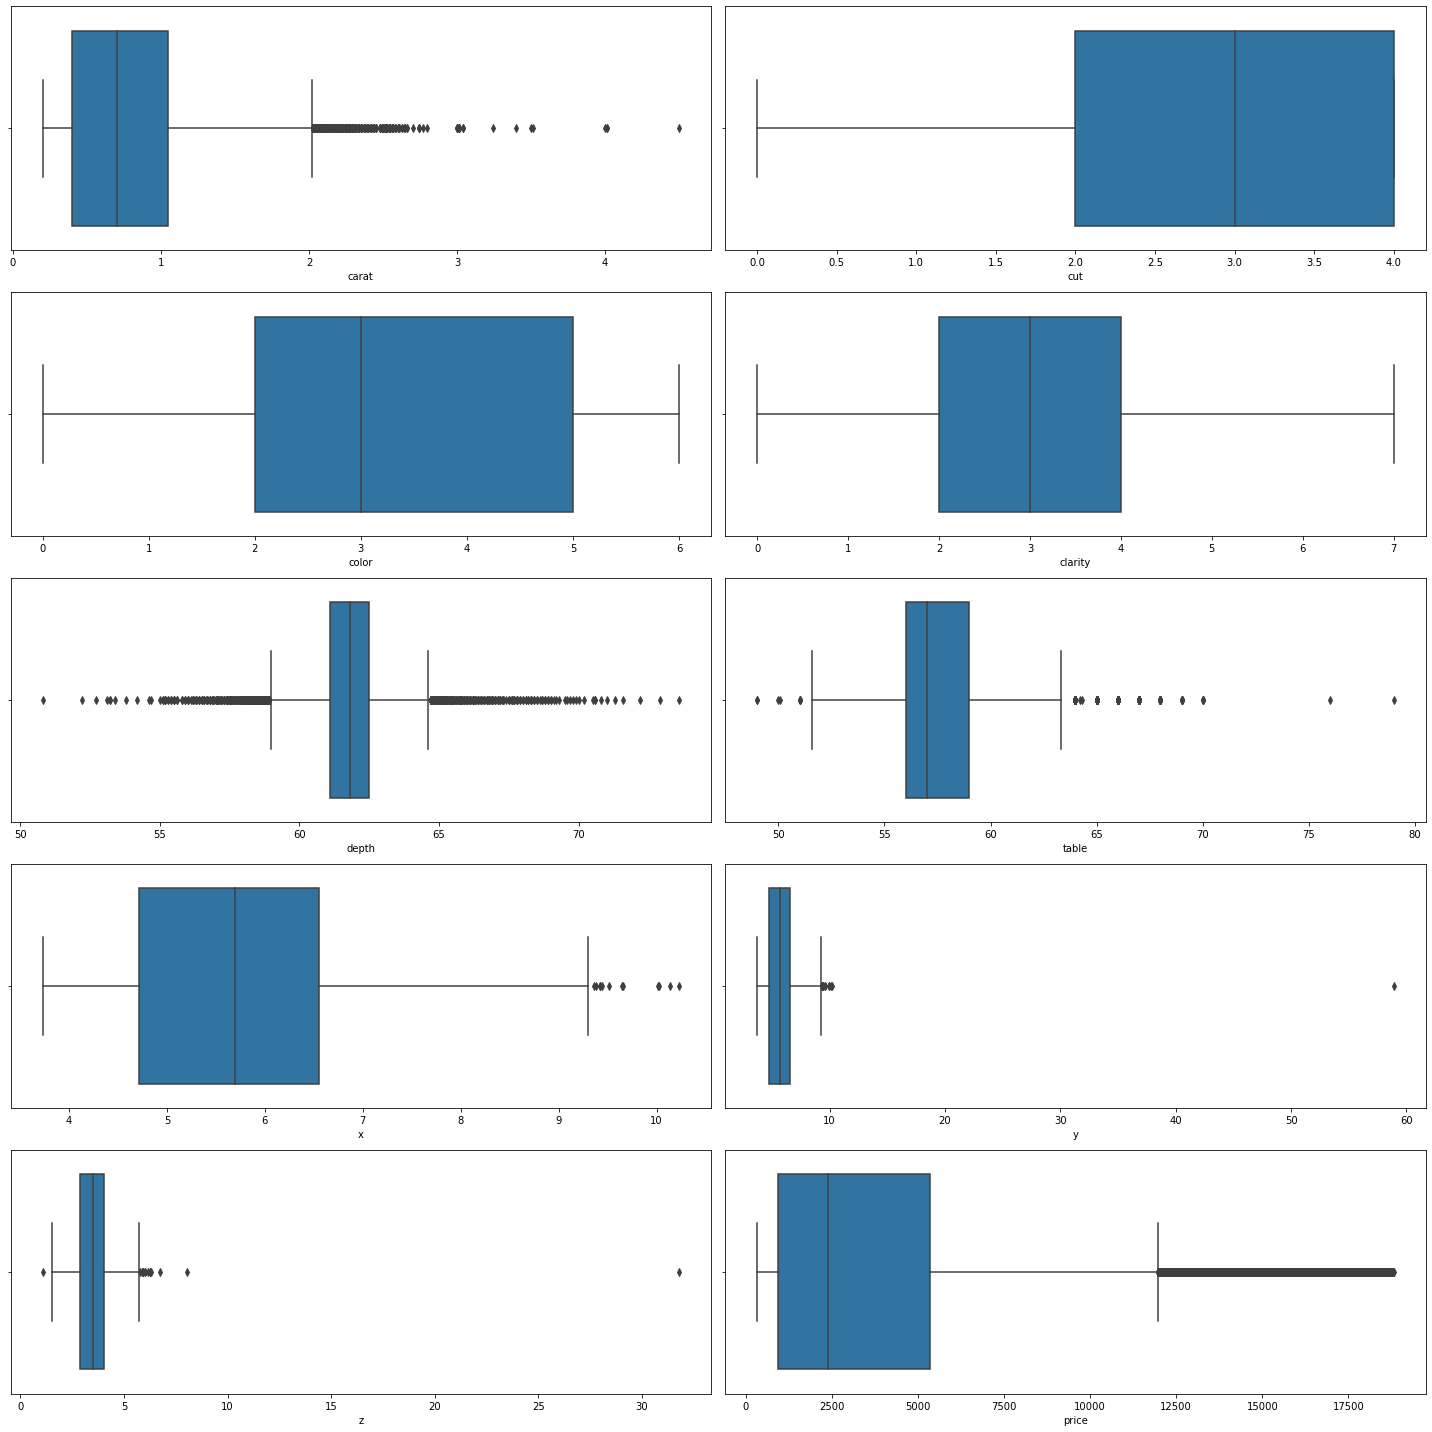

In [30]:
data_plot=df
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df.shape)

From the above boxplot, it is clear that except for cut and clarity, rest all attributes are having outliers. Let's treat the outliers using IQR method.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Outliers Treatment

In [31]:
cont=df.dtypes[(df.dtypes!='int8')].index
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [32]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

Shape after Outliers Treatment (26933, 10)


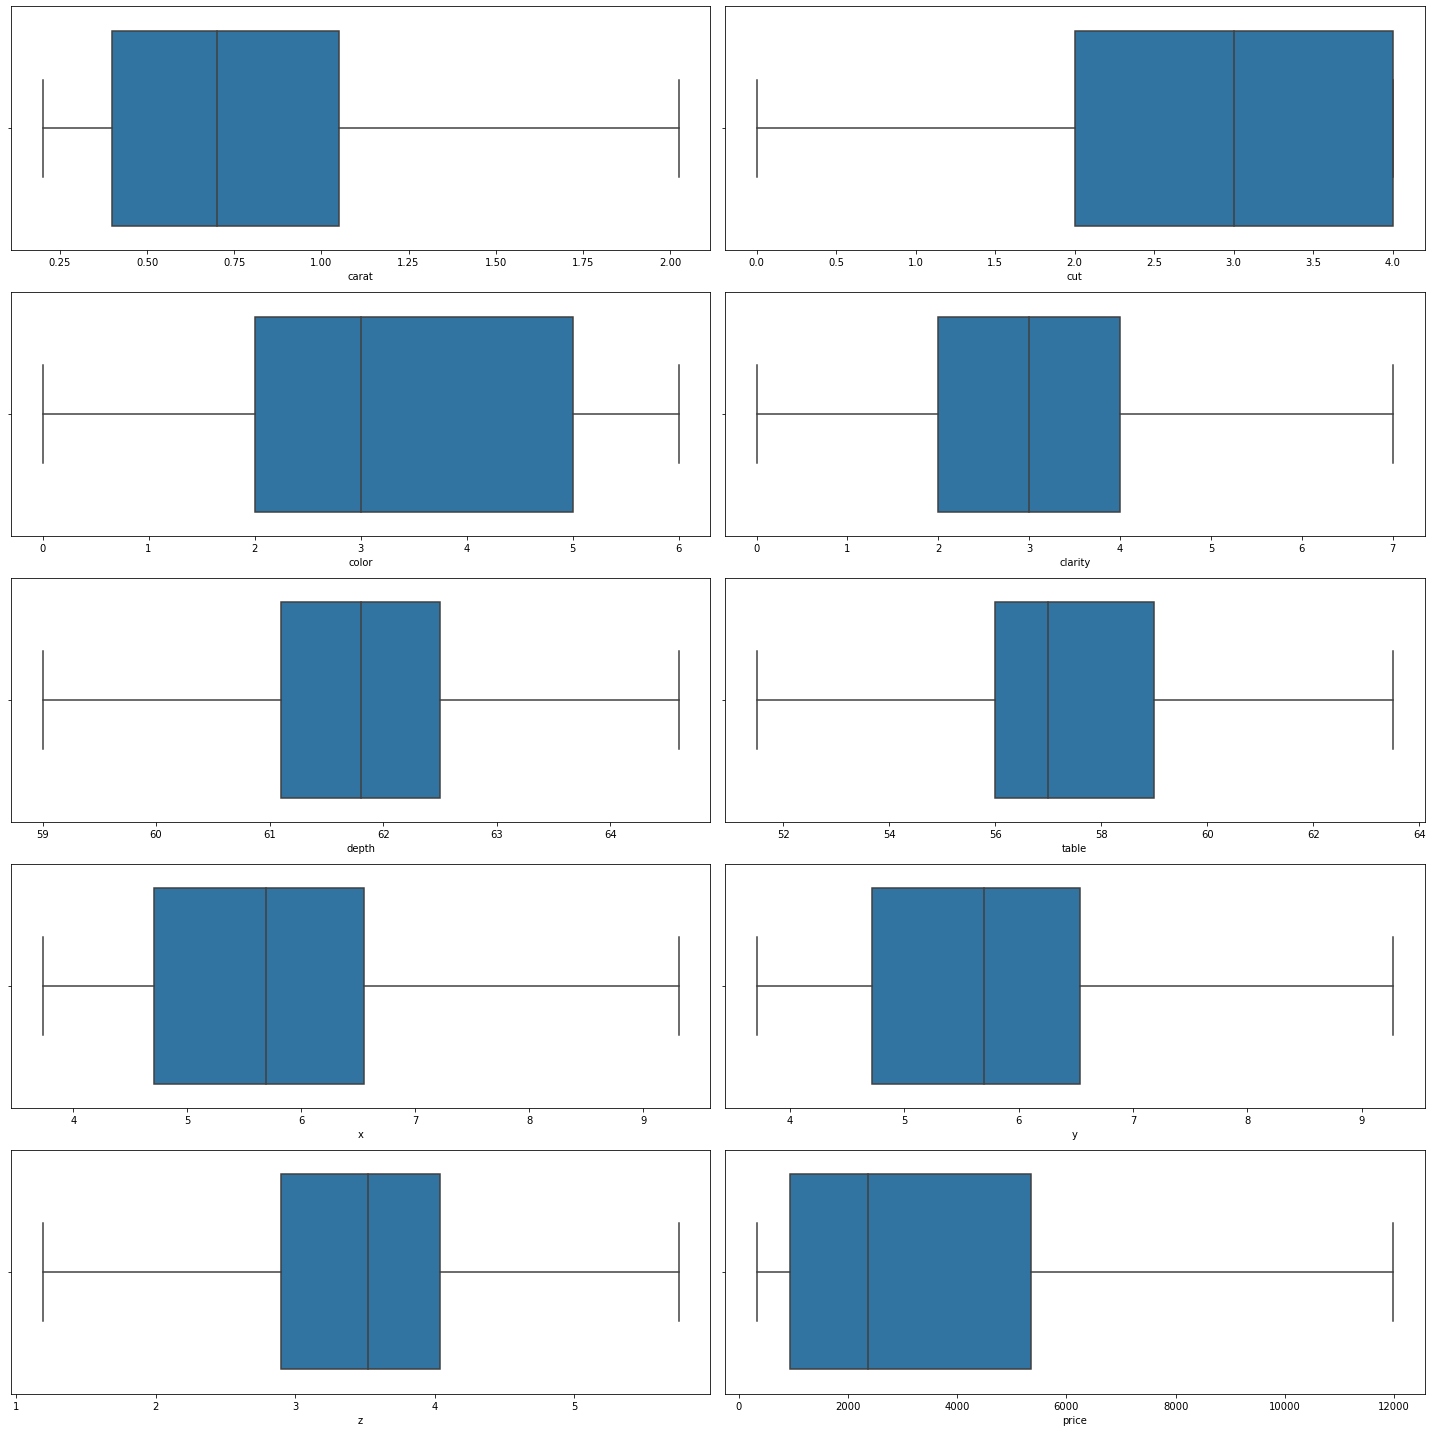

In [33]:
data_plot=df
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',df.shape)

All the outliers are treating using IQR method. Now the dataset is good to go for further analysis and model building.

Text(0.5, 1.0, 'z')

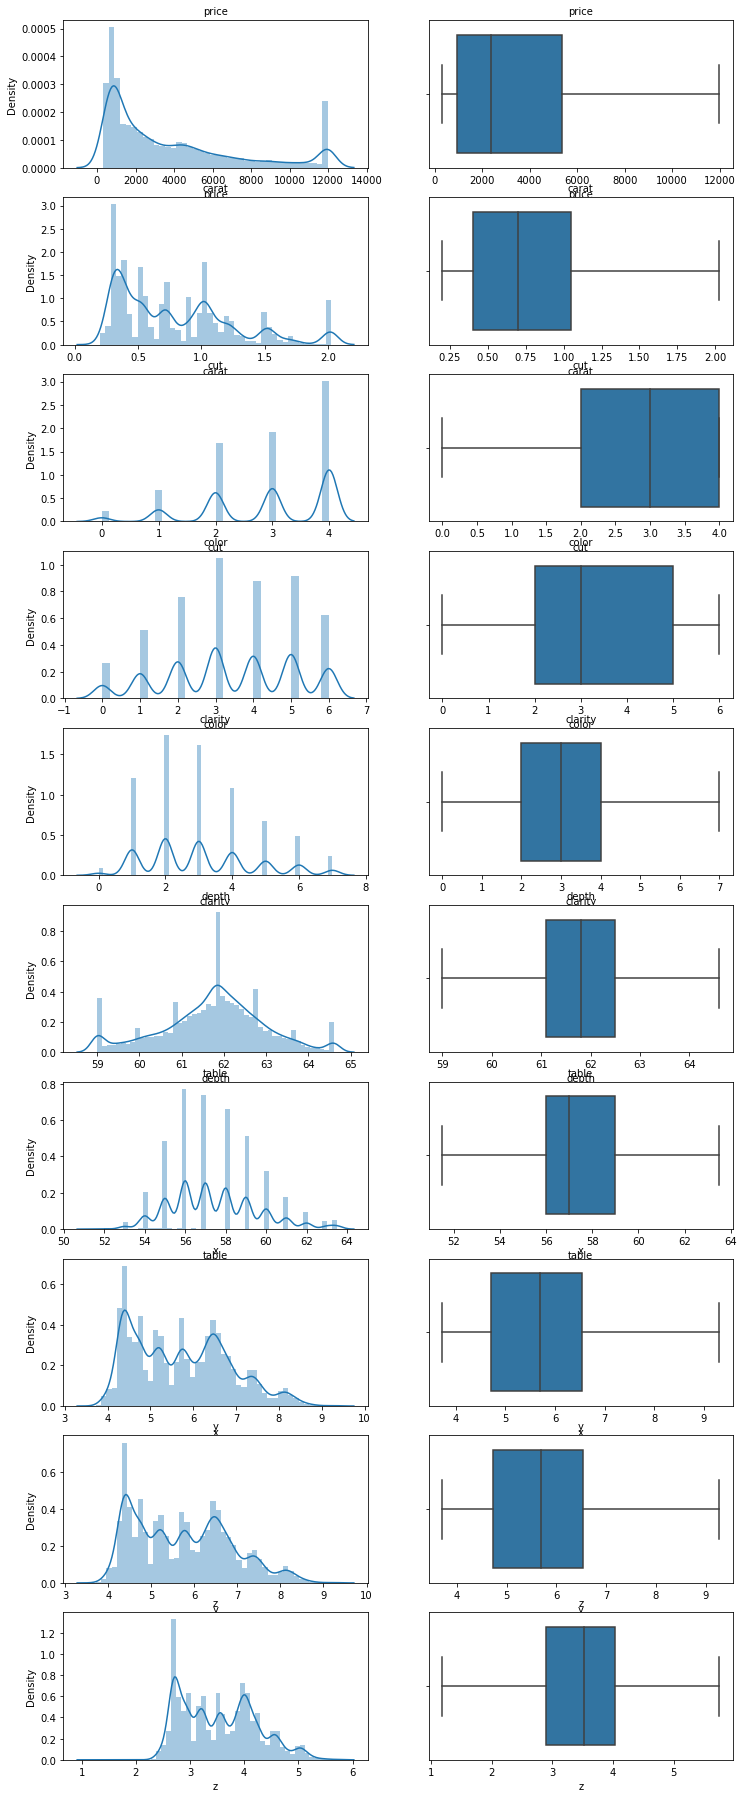

In [34]:
fig, axes = plt.subplots(nrows=10,ncols=2)
fig.set_size_inches(12,32)

a = sns.distplot(df['price'] , ax=axes[0][0])
a.set_title("price",fontsize=10)
a = sns.boxplot(df['price'] , orient = "v" , ax=axes[0][1])
a.set_title("price",fontsize=10)

a = sns.distplot(df['carat'] , ax=axes[1][0])
a.set_title("carat",fontsize=10)
a = sns.boxplot(df['carat'] , orient = "v" , ax=axes[1][1])
a.set_title("carat",fontsize=10)

a = sns.distplot(df['cut'] , ax=axes[2][0])
a.set_title("cut",fontsize=10)
a = sns.boxplot(df['cut'] , orient = "v" , ax=axes[2][1])
a.set_title("cut",fontsize=10)

a = sns.distplot(df['color'] , ax=axes[3][0])
a.set_title("color",fontsize=10)
a = sns.boxplot(df['color'] , orient = "v" , ax=axes[3][1])
a.set_title("color",fontsize=10)

a = sns.distplot(df['clarity'] , ax=axes[4][0])
a.set_title("clarity",fontsize=10)
a = sns.boxplot(df['clarity'] , orient = "v" , ax=axes[4][1])
a.set_title("clarity",fontsize=10)

a = sns.distplot(df['depth'] , ax=axes[5][0])
a.set_title("depth",fontsize=10)
a = sns.boxplot(df['depth'] , orient = "v" , ax=axes[5][1])
a.set_title("depth",fontsize=10)

a = sns.distplot(df['table'] , ax=axes[6][0])
a.set_title("table",fontsize=10)
a = sns.boxplot(df['table'] , orient = "v" , ax=axes[6][1])
a.set_title("table",fontsize=10)

a = sns.distplot(df['x'] , ax=axes[7][0])
a.set_title("x",fontsize=10)
a = sns.boxplot(df['x'] , orient = "v" , ax=axes[7][1])
a.set_title("x",fontsize=10)

a = sns.distplot(df['y'] , ax=axes[8][0])
a.set_title("y",fontsize=10)
a = sns.boxplot(df['y'] , orient = "v" , ax=axes[8][1])
a.set_title("y",fontsize=10)

a = sns.distplot(df['z'] , ax=axes[9][0])
a.set_title("z",fontsize=10)
a = sns.boxplot(df['z'] , orient = "v" , ax=axes[9][1])
a.set_title("z",fontsize=10)


#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">1.3. b. Data Split: Split the data into test and train (70:30). 

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Train-Test Split

In [35]:
y = df[['price']]
X = df.drop('price', axis=1)

In [36]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65


In [37]:
y.head()

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">1.3. c.Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Linear Regression Model

In [39]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [40]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8882.904684932793
The coefficient for cut is 110.30045919017721
The coefficient for color is 278.2537877852566
The coefficient for clarity is 440.2126194816569
The coefficient for depth is 29.26427428108093
The coefficient for table is -12.8727215627634
The coefficient for x is -1244.3836422287163
The coefficient for y is 1414.9774396064429
The coefficient for z is -892.2704979857059


In [41]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -4808.021482770137


In [42]:
# R square on training data
regression_model.score(X_train, y_train)

0.9312965671402532

In [43]:
# R square on testing data
regression_model.score(X_test, y_test)

0.931355113617765

In [44]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

908.3892301779633

In [45]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

910.1909037288773

Text(0.5, 1.0, 'Train Test split')

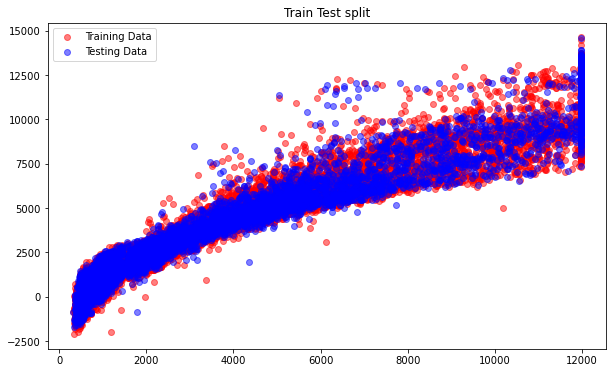

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(y_train,predicted_train, label = 'Training Data',color = 'r',alpha = 0.5)
plt.scatter(y_test,predicted_test, label = 'Testing Data',color = 'b',alpha = 0.5)
plt.legend()
plt.title('Train Test split')


# plt.scatter(y_train['price'],predicted_train)

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Linear Regression using statsmodels

We use alternate method of Linear Regression Statsmodel to SKLearn library due to the following reasons:
    
    1. When interpretatbility and impact of independant variables required. The t-distribution and P-values          determine the same.   
    
    2. When Multi-collinearity between independent variables exist and confirm whether the sample dataset            comes as same from the Universe.   
       This done by hypothesis testing (t-test) @ 95% confidence interval level, where If Pvalue>0.05 then we        fail to reject null hypothesis (Ho) and confirm that the coefficients between variables Y and Xs are 0.
       If Pvalue<0.05 then we reject null hypothesis (Ho) and confirm that the coefficients between variables        Y and Xs are not = 0.    
       
      Note: This is basically done if the Pairplot shows positive linearity in relationship between                       independant variables but the coefficients are other way around. This is an indicator that there               could be multicollinearity. To confirm the same using hypothesis testing is done.  
    
    3. To confirm whether the model is performed good, we go by the model accuracy which is through R^2              however, R^2 has statistical fluke factored in it. Therefore we find the Adjusted R^2 (Adj R^2) which          confirms the model accuracy.

In [49]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2,2,3,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,4,5,3,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,4,3,2,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1,5,1,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3,4,1,61.1,62.0,6.54,6.49,3.98,4057.0


In [50]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [51]:
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params


Intercept   -4808.021483
carat        8882.904685
cut           110.300459
color         278.253788
clarity       440.212619
depth          29.264274
table         -12.872722
x           -1244.383642
y            1414.977440
z            -892.270498
dtype: float64

In [52]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.838e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        03:25:09   Log-Likelihood:            -1.5517e+05
No. Observations:               18853   AIC:                         3.104e+05
Df Residuals:                   18843   BIC:                         3.104e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4808.0215    797.340     -6.030      0.0

##### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#008B8B;">The overall model is good with Adj R^2 @ 93.1%.  

<span style="font-family: Helvetica; font-weight:regular;font-size:1.1em;color:#008B8B;">The overall P value<0.05 (Prob (F-statistic)), so rejecting null-hypothesis (H0) and accepting alternate-hypothesis (Ha) that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0. Hence the model is good to go.

 <span style="font-family: Helvetica; font-weight:regular;font-size:1.1em;color:#008B8B;">All the attributes have P value<0.05 which means they are contributing to the predictability of the Class of interest.

 <span style="font-family: Helvetica; font-weight:regular;font-size:1.1em;color:#008B8B;">However it is important to note that carat, x, y & z have collinearity as well high standard error. But still they are good predictors for <b>Y variable, 'price'</b> in this case. As a business decision we can take a call to retain all these attributes.





#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Addressing the issue of negative intercept

But one thing to be observed is that the intercept is in negative that too far-off. This is meaningless, however it’s a business call when only the prediction the problem to be solved, we choose to ignore this.  

We address this issue by centring the data using z score(standard scaling). In this manner we will bring the intercept to 0.  

We will give equations with non-scaled data (negative intercept) and with scaled data (zero intercept). The model accuracy or the output will not impact because of this however it is the interpretability call as a business we need to take.  

Both models will be presented, however we shall go with the non-scaled data while presenting the inference to business.

In [53]:
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [54]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model_scaled = LinearRegression()
regression_model_scaled.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [55]:
# concatenate X and y into a single dataframe
data_train_scaled = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_test_scaled=pd.concat([X_test_scaled,y_test_scaled],axis=1)
data_train_scaled.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,-0.983742,-0.826474,-0.819083,-0.034626,0.537882,1.194109,-1.176262,-1.159265,-1.121661,-0.923160
2275,-1.070676,0.981336,0.941779,-0.034626,-0.453630,-1.127570,-1.229747,-1.275960,-1.280335,-0.834576
19183,-0.636006,0.981336,-0.232129,-0.641330,0.620508,-0.198899,-0.570093,-0.611693,-0.530240,-0.720311
5030,0.668006,-1.730378,0.941779,-1.248033,1.281516,-0.663234,0.713557,0.761724,0.883399,0.094835
25414,0.494138,0.077431,0.354825,-1.248033,-0.536256,2.122780,0.722471,0.680935,0.638176,0.092527


In [56]:
lm2 = smf.ols(formula= expr, data = data_train_scaled).fit()
lm2.params

Intercept   -1.890849e-16
carat        1.179348e+00
cut          3.521048e-02
color        1.367900e-01
clarity      2.093646e-01
depth        1.021970e-02
table       -7.999363e-03
x           -4.027979e-01
y            4.548370e-01
z           -1.784848e-01
dtype: float64

In [57]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_scaled.coef_[0][idx]))

The coefficient for carat is 1.1793478973913327
The coefficient for cut is 0.035210479046902624
The coefficient for color is 0.13678995697364024
The coefficient for clarity is 0.20936462472657177
The coefficient for depth is 0.0102197046891944
The coefficient for table is -0.007999363456359754
The coefficient for x is -0.4027979047610226
The coefficient for y is 0.45483696154156106
The coefficient for z is -0.17848481636348276


In [58]:
intercept = regression_model_scaled.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.7260308703610896e-16


In [59]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model_scaled.score(X_test_scaled, y_test_scaled)

0.9313401279349518

In [60]:
# Calculate MSE
mse = np.mean((regression_model_scaled.predict(X_test_scaled)-y_test_scaled)**2)
mse

price    0.06866
dtype: float64

In [61]:
#Root Mean Squared Error - RMSE
math.sqrt(mse)

0.2620302884497293

In [62]:
# Prediction on Test data
y_pred = regression_model_scaled.predict(X_test_scaled)
                     

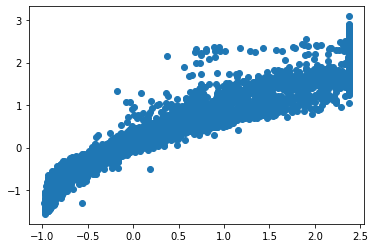

In [63]:
plt.scatter(y_test_scaled['price'], y_pred)

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Check Multi-collinearity using VIF

In [64]:
vif = [variance_inflation_factor(data_train_scaled.values, ix) for ix in range(data_train_scaled.shape[1])] 

In [65]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 53.097510380450714
cut ---> 1.5266013259889408
color ---> 1.3908142223345548
clarity ---> 1.8709126253620987
depth ---> 4.051253780123301
table ---> 1.6153586884944267
x ---> 440.12401282913794
y ---> 422.2941881555521
z ---> 205.42446719697833


Like pairplot, correlation matrix and heatmap, it is evident that carat and size and shape dimensions are highly correlated to each other, therefore, we can predict the price based on one of these variables where the other variables are also correlated. However since only the prediction of price is the main problem given in this case, we ignore the multicollinearity between independant variables and proceed with our decision to choose the equation.

As we saw in the pairplot too, carat,x,y,z are having high multicollinearity. However with hypothesis testing, we retain these attribute for prediction as the Adj R^2 >90% @93.1% and the Pvalue <0.05.

#### <span style="font-family: Arial; font-weight:regular;font-size:1.1em;color:#2F4F4F">Linear equation non-scaled data with negative intercept

In [66]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-4808.02) * Intercept + (8882.9) * carat + (110.3) * cut + (278.25) * color + (440.21) * clarity + (29.26) * depth + (-12.87) * table + (-1244.38) * x + (1414.98) * y + (-892.27) * z + 

#### <span style="font-family: Arial; font-weight:regular;font-size:1.0em;color:#2F4F4F">Linear equation scaled data with zero intercept

In [67]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (1.18) * carat + (0.04) * cut + (0.14) * color + (0.21) * clarity + (0.01) * depth + (-0.01) * table + (-0.4) * x + (0.45) * y + (-0.18) * z + 

##### <span style="font-family: Helvetica; font-weight:regular;font-size:1.1em;color:#008B8B;">The Linear Regression equations are ( before and after scaled):  

<span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#008B8B;">a. Before scaling using z-score, with intercept in large negative:
<span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#008B8B;">price =  (-4808.02) * Intercept + (8882.9) * carat + (110.3) * cut + (278.25) * color + (440.21) * clarity + (29.26) * depth + (-12.87) * table + (-1244.38) * x + (1414.98) * y + (-892.27) * z
 
<span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#008B8B;">b. After scaling using z-score, with intercept ~= 0:
<span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#008B8B;">price = (-0.0) * Intercept + (1.18) * carat + (0.04) * cut + (0.14) * color + (0.21) * clarity + (0.01) * depth + (-0.01) * table + (-0.4) * x + (0.45) * y + (-0.18) * z + 

##### <span style="font-family: Helvetica; font-weight:regular;font-size:1.1em;color:#708090;">The final Linear Regression equation is:    

<span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#708090;">a. Before scaling using z-score, with intercept in large negative:
    
<span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#708090;">price =  (-4808.02) * Intercept + (8882.9) * carat + (110.3) * cut + (278.25) * color + (440.21) * clarity + (29.26) * depth + (-12.87) * table + (-1244.38) * x + (1414.98) * y + (-892.27) * z
    
<span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#708090;">The interpretation of this is:
        
<span style="font-family: Helvetica; font-weight:regular;font-size:1.0em;color:#708090;">for every one unit change in an independent variable, the price varies to that of co-efficients, i.e. for every one unit change in carat, the price changes 8882.9, similarly for every one unit change in clarity, price changes by 440.21.

In [68]:
regression_model = LinearRegression()
regression_model_scaled = LinearRegression()
models=[regression_model, regression_model_scaled]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]


for i in models:
    if (i != regression_model_scaled):
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        
    else :
        i.fit(X_train_scaled,y_train)
        scores_train.append(i.score(X_train_scaled, y_train))
        scores_test.append(i.score(X_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression with negative intercept value', 'Linear Regression with zero intercept value']))

                                                 Train RMSE   Test RMSE  \
Linear Regression with negative intercept value   908.38923  910.190904   
Linear Regression with zero intercept value       908.38923  910.474386   

                                                 Training Score  Test Score  
Linear Regression with negative intercept value        0.931297    0.931355  
Linear Regression with zero intercept value            0.931297    0.931312  


The model has performed good with both the R^2 and Adj R^2 @ 93% also the model is perfectly performed with no under or over-fitting (Train & Test scores are almost similar). Also the model has performed the same for both non-scaled as well as scaled-data. Therefore we select the Linear Equation with non-scaled data as the prediction is good as well the interpretability on the final data is clear. 

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF4500">1.4. Inference: Basis on these predictions, what are the business insights and recommendations.

The Linear Regression model build has performed well. It is concluded that from this model, since the problem is about price prediction, we go ahead with the Linear equation for price prediction of non-scaled data. Though sklearn and Stats model methods produced same results, stats models helped us to understand whether there is really a collinearity issue based on the values where we rejected the null hypothesis and agreed that the Y and Xs variables are not equal to zero. Also the Adjusted R2 value is very good and the model proved to be good to go.

The Final Linear Regression equation is:

Before scaling using z-score, with intercept in large negative: price = (-4808.02) * Intercept + (8882.9) * carat + (110.3) * cut + (278.25) * color + (440.21) * clarity + (29.26) * depth + (-12.87) * table + (-1244.38) * x + (1414.98) * y + (-892.27) * z+

Based on the EDA and model building done on the dataset for predicting the price of the Zirconia stones, following are the 

#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#228B22">Business insights:

The dataset is skewed and not normally distributed for many variables. The attributes, 'carat','x','y' & 'z' are not normally distributed. This could be indicator also that these independent variables are correlated to each other. This is multicollinearity and will be an issue in Linear regression.

The assumption in LR is that the independent variables should not be correlated to each other. This will reduce the variance and the dataset will not over-fit while performing the model evaluation in Train & Test split.

Let's check the same with correlation matrix, heat-map and OLS method using stats model. However note that the problem statement is all about predicting the target variable, in this case 'price' and not about the independent variables.

The pair plot is a wonderful visualisation tool to perform multivariate analysis and also to understand the distribution of data for the attributes. From the pair-plot we can find the following:
	
	a. ’Depth' is normally distributed as well does not have multimodal which indicates, it can be a good
	     predictor of dependent variable.
	
	b. ’table','color' & 'x', 'z' are normally distributed but with multimodal peaks.

	c.  Rest all the data are either right or left skewed, which we also saw in the skew test. This is could-
	     be the presence of a multicollinearity issue.

 5.   From the heat-map, we can infer the following on correlation:

	a. The predictor variable 'price' is highly positive correlated with 4 out of 9 variables.  
	           a. price - carat: High positive correlation with 0.94.  
   	           b. price - x, y, z (which basically means size) - High positive correlation with 0.91 respectively.  

 	b. Independent variables 'carat', 'x', 'y', & 'z' are highly positive correlated which is an indication of
	    Multicollinearity issue.
		a. carat - x, y & z - High positive correlation of 0.98 respectively.
        		b. x - y is perfectly positive correlated to max with 1
        		c. x - z & y - z is near perfectly positive correlated to max with 0.99.


#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#FF00FF">Inference and recommendations:

The dataset has balanced and sufficient data in it to build a model and evaluate the same. Therefore the data sourcing is good.

There is a multicollinearity issue among the independent variables of 'carat', 'x', 'y' & 'z'.                                       The data on x, y, z can be compressed into shape/size however good insights available from the same. a. Higher the carat values, higher the price. One unit change in carat increases price by 8882.9. b. Similarly next big positive price determinant is y (width in mm) of the zirconia gemstone. One unit change in 'y' increases price by 1414.98. c. 'x' (length in mm) is the largest price puller where one unit change in 'x', price reduces by 1244.38.

The Ideal cut has higher records of 10805, color G with 5653 and clarity grade SI1 with 6565. This gives an indication that there is demand for products with combination of these attributes. Thereby it is recommended to the management that a clustering to be done and each clusters should be treated with different pricing and marketing/promotional strategies. 

Create segment with high ‘carat’, ‘clarity’ and width(‘y’) value stones into premium category and can be sold in premium as Luxury emotional appeal, which could be good alternate for diamonds. 

Moderate ‘carat’,  ‘clarity’ SI2, VS2, VS1 and width(‘y’) value stones into 'Daily wear' category and can be sold as 'Mass appeal', which could be good alternate for diamonds to working class and middle class of economy. 

The pricing can be determined using the final Linear Equation as it predicts the pricing with low bias and low variance(no under or over-fitting) model.


#### <span style="font-family: Helvetica; font-weight:regular;font-size:1.2em;color:#2F4F4F">---------------------------------------------------------------------------- End of report ----------------------------------------------------------------------------